In [1]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
import torch.optim as optim
from torch.utils.data import Dataset, random_split, DataLoader
from PIL import Image
from keras import models
import torchvision.models as models
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import torchvision.transforms as T
from torchvision.datasets import ImageFolder
import torch.nn.functional as F
import torch.nn as nn
from torchvision.utils import make_grid
%matplotlib inline

DATA_DIR = '/content/drive/MyDrive/CUB_dataset'
TRAIN_DIR = '/content/drive/MyDrive/CUB_dataset/train'
TEST_DIR = '/content/drive/MyDrive/CUB_dataset/test'

train_data = ImageFolder(TRAIN_DIR)
test_data = ImageFolder(TEST_DIR)
len(train_data), len(test_data)

(5994, 5794)

In [9]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cuda:0


In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((224, 224))])

batch_size = 32

trainset = ImageFolder(TRAIN_DIR, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size , shuffle=True, num_workers=2)
testset = ImageFolder(TEST_DIR, transform=transform)
testloader = DataLoader(testset, batch_size=batch_size , shuffle=False, num_workers=2)




In [6]:
classes = list(train_data.class_to_idx.keys())
classes

['001.Black_footed_Albatross',
 '002.Laysan_Albatross',
 '003.Sooty_Albatross',
 '004.Groove_billed_Ani',
 '005.Crested_Auklet',
 '006.Least_Auklet',
 '007.Parakeet_Auklet',
 '008.Rhinoceros_Auklet',
 '009.Brewer_Blackbird',
 '010.Red_winged_Blackbird',
 '011.Rusty_Blackbird',
 '012.Yellow_headed_Blackbird',
 '013.Bobolink',
 '014.Indigo_Bunting',
 '015.Lazuli_Bunting',
 '016.Painted_Bunting',
 '017.Cardinal',
 '018.Spotted_Catbird',
 '019.Gray_Catbird',
 '020.Yellow_breasted_Chat',
 '021.Eastern_Towhee',
 '022.Chuck_will_Widow',
 '023.Brandt_Cormorant',
 '024.Red_faced_Cormorant',
 '025.Pelagic_Cormorant',
 '026.Bronzed_Cowbird',
 '027.Shiny_Cowbird',
 '028.Brown_Creeper',
 '029.American_Crow',
 '030.Fish_Crow',
 '031.Black_billed_Cuckoo',
 '032.Mangrove_Cuckoo',
 '033.Yellow_billed_Cuckoo',
 '034.Gray_crowned_Rosy_Finch',
 '035.Purple_Finch',
 '036.Northern_Flicker',
 '037.Acadian_Flycatcher',
 '038.Great_Crested_Flycatcher',
 '039.Least_Flycatcher',
 '040.Olive_sided_Flycatcher',
 '

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


171.Myrtle_Warbler 151.Black_capped_Vireo 136.Barn_Swallow 163.Cape_May_Warbler 129.Song_Sparrow 096.Hooded_Oriole 165.Chestnut_sided_Warbler 170.Mourning_Warbler 171.Myrtle_Warbler 153.Philadelphia_Vireo 134.Cape_Glossy_Starling 135.Bank_Swallow 083.White_breasted_Kingfisher 089.Hooded_Merganser 149.Brown_Thrasher 075.Green_Jay 077.Tropical_Kingbird 013.Bobolink 109.American_Redstart 197.Marsh_Wren 176.Prairie_Warbler 041.Scissor_tailed_Flycatcher 054.Blue_Grosbeak 090.Red_breasted_Merganser 138.Tree_Swallow 189.Red_bellied_Woodpecker 128.Seaside_Sparrow 049.Boat_tailed_Grackle 052.Pied_billed_Grebe 159.Black_and_white_Warbler 003.Sooty_Albatross 079.Belted_Kingfisher


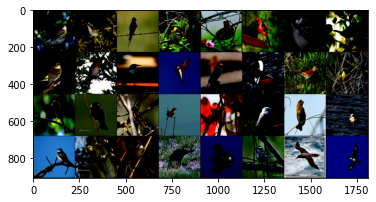

In [10]:

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
plt.imshow(torchvision.utils.make_grid(images).permute(1,2,0))
 #print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [26]:
model = torch.hub.load ('pytorch/vision:v0.10.0', 'resnet18', pretrained = False)
model.to(device)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [27]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [41]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

Finished Training


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:  001.Black_footed_Albatross 001.Black_footed_Albatross 001.Black_footed_Albatross 001.Black_footed_Albatross 001.Black_footed_Albatross 001.Black_footed_Albatross 001.Black_footed_Albatross 001.Black_footed_Albatross 001.Black_footed_Albatross 001.Black_footed_Albatross


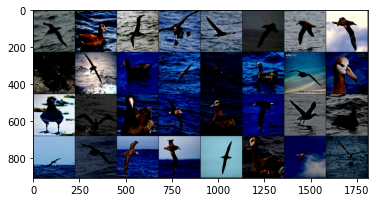

In [48]:
dataiter = iter(testloader)
images, labels = dataiter.next()
plt.imshow(torchvision.utils.make_grid(images).permute(1,2,0))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(10)))

In [49]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(10)))

Predicted:  064.Ring_billed_Gull 187.American_Three_toed_Woodpecker 028.Brown_Creeper 051.Horned_Grebe 042.Vermilion_Flycatcher 102.Western_Wood_Pewee 077.Tropical_Kingbird 176.Prairie_Warbler 181.Worm_eating_Warbler 053.Western_Grebe


In [50]:
model.eval()
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 6 %


In [51]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: 001.Black_footed_Albatross is 0.0 %
Accuracy for class: 002.Laysan_Albatross is 0.0 %
Accuracy for class: 003.Sooty_Albatross is 0.0 %
Accuracy for class: 004.Groove_billed_Ani is 0.0 %
Accuracy for class: 005.Crested_Auklet is 14.3 %
Accuracy for class: 006.Least_Auklet is 18.2 %
Accuracy for class: 007.Parakeet_Auklet is 4.3 %
Accuracy for class: 008.Rhinoceros_Auklet is 38.9 %
Accuracy for class: 009.Brewer_Blackbird is 6.9 %
Accuracy for class: 010.Red_winged_Blackbird is 0.0 %
Accuracy for class: 011.Rusty_Blackbird is 0.0 %
Accuracy for class: 012.Yellow_headed_Blackbird is 53.8 %
Accuracy for class: 013.Bobolink is 0.0 %
Accuracy for class: 014.Indigo_Bunting is 0.0 %
Accuracy for class: 015.Lazuli_Bunting is 0.0 %
Accuracy for class: 016.Painted_Bunting is 25.0 %
Accuracy for class: 017.Cardinal is 0.0 %
Accuracy for class: 018.Spotted_Catbird is 13.3 %
Accuracy for class: 019.Gray_Catbird is 0.0 %
Accuracy for class: 020.Yellow_breasted_Chat is 0.0 %
Accura